In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


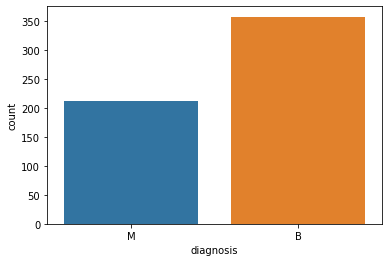

In [4]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [5]:
# Importing data
del data['Unnamed: 32']

In [6]:
data.shape

(569, 32)

In [7]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [9]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#adding the input and first hidden layer
classifier = Sequential()
#adding the 1st hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
#adding the 2nd hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 3rd hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 4th hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [12]:
classifier.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
classifier.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.6722 - accuracy: 0.6374
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6374
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6374
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6374
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6374
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.6374
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.6374
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6374
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6374
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6374
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9868
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9890
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9890
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9890
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9890
Epoch 88/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9890
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9890
Epoch 90/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9890
Epoch 91/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9890
Epoch 92/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9890
Epoch 93/100


In [14]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 2ms/step


In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

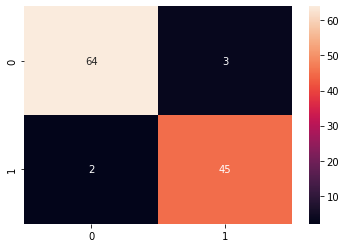

In [17]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [18]:
(66+43)/(66+43+4+1) #(tp+tn)/(tp+tn+fp+fn)

0.956140350877193

## Cross Validation

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [20]:
def CV_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [21]:
classifier = KerasClassifier(build_fn = CV_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [22]:
accuracies

array([0.97826087, 0.97826087, 0.60869563, 0.97826087, 0.95652175,
       0.93333334, 0.95555556, 0.97777778, 0.5777778 , 0.93333334])

In [23]:
accuracies.mean()

0.8877777814865112

In [24]:
accuracies.std()

0.14836393888646365

# Parameter Optimization

In [25]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [26]:
def PO_classifier(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [27]:
classifier = KerasClassifier(build_fn = PO_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',cv = 10)

In [28]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
41/41 [==============================] - 1s 2ms/step - loss: 0.6765 - accuracy: 0.6235
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6235
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6235
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6235
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6235
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.6235
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.6235
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.6235
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.6235
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7751
Epoch 11/

41/41 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 90/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 93/100


41/41 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9853
Epoch 46/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9853
Epoch 47/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9878
Epoch 48/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9878
Epoch 49/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9878
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9878
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9902
Epoch 52/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9902
Epoch 53/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9902
Epoch 54/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9902
Epoch 55/100


2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 1.0802 - accuracy: 0.3619
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.8589 - accuracy: 0.3619
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.3619
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.7579
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.9267
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.9022
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.8778
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.8680
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.8411
Epoch 10/100
41/41 [==============================] - 0s 1

41/41 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9927
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9927
Epoch 58/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9927
Epoch 59/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9927
Epoch 60/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9927
Epoch 61/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9927
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9927
Epoch 63/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9927
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9927
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9927
Epoch 66/100


41/41 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9878
Epoch 19/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9878
Epoch 20/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9878
Epoch 21/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.9878
Epoch 22/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9878
Epoch 23/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9878
Epoch 24/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9878
Epoch 25/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9878
Epoch 26/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9878
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9878
Epoch 28/100


2/2 [==============================] - 0s 1ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6439
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6439
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6439
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6439
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.6463
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.9171
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.9585
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.9683
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9732
Epoch 10/100
41/41 [==============================] - 0s 1

41/41 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9902
Epoch 63/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9902
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9902
Epoch 66/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9902
Epoch 67/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9902
Epoch 68/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 69/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 70/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 71/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9902
Epoch 72/100


41/41 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.9682
Epoch 25/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.9707
Epoch 26/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.9731
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9756
Epoch 28/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.9756
Epoch 29/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.9780
Epoch 30/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.9780
Epoch 31/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9804
Epoch 32/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9853
Epoch 33/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9853
Epoch 34/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 93/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 94/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 95/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 96/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 97/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9951
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9951
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9951
Epoch 52/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9951
Epoch 53/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9951
Epoch 54/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9951
Epoch 55/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9951
Epoch 56/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9951
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9951
Epoch 58/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9951
Epoch 59/100


41/41 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.6390
Epoch 12/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.6390
Epoch 13/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.6390
Epoch 14/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.6390
Epoch 15/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.6390
Epoch 16/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7780
Epoch 17/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.9439
Epoch 18/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.9512
Epoch 19/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.9732
Epoch 20/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.9780
Epoch 21/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9878
Epoch 94/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9878
Epoch 95/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9878
Epoch 96/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9878
Epoch 97/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9878
Epoch 98/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9878
Epoch 99/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7368 - accuracy: 0.3585
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6585
Epoch 3/100
41/41 [==============================]

41/41 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9902
Epoch 56/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9902
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9902
Epoch 58/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9902
Epoch 59/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9902
Epoch 60/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9902
Epoch 61/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9902
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9902
Epoch 63/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9902
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9902
Epoch 65/100


41/41 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.9462
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.9511
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.9584
Epoch 20/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.9584
Epoch 21/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.9633
Epoch 22/500
41/41 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.9707
Epoch 23/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.9682
Epoch 24/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.9707
Epoch 25/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.9756
Epoch 26/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.9756
Epoch 27/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 101/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 102/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 103/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 104/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 105/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 106/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 107/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9927
Epoch 263/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9927
Epoch 264/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9927
Epoch 265/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9927
Epoch 266/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9927
Epoch 267/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9927
Epoch 268/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9927
Epoch 269/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9927
Epoch 270/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9976
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9976
Epoch 425/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9976
Epoch 426/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9976
Epoch 427/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9976
Epoch 428/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9976
Epoch 429/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9976
Epoch 430/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9976
Epoch 431/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9976
Epoch 432/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 86/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 87/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9902
Epoch 88/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 89/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9902
Epoch 90/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9902
Epoch 91/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9902
Epoch 92/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9902
Epoch 93/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9902
Epoch 94/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 95/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 248/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 249/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 250/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 251/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 252/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 253/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 254/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 255/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 256/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 410/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 411/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 412/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 413/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 414/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 415/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 416/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 417/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 418/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9902
Epoch 72/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9902
Epoch 73/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9902
Epoch 74/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9902
Epoch 75/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9902
Epoch 76/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9902
Epoch 77/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9902
Epoch 78/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9902
Epoch 79/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9902
Epoch 80/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9902
Epoch 81/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 234/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 235/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 236/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 237/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 238/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 239/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 240/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 241/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 242/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 396/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 397/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 398/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 399/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 400/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 401/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 402/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 403/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 404/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9927
Epoch 58/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9927
Epoch 59/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9927
Epoch 60/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9927
Epoch 61/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9927
Epoch 62/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9927
Epoch 63/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9927
Epoch 64/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9927
Epoch 65/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9927
Epoch 66/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9927
Epoch 67/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 220/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 221/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 222/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 223/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 224/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 225/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 226/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 227/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 228/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 382/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 383/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 384/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 385/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 386/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 387/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 388/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 389/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 390/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9927
Epoch 44/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9927
Epoch 45/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9927
Epoch 46/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9927
Epoch 47/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9927
Epoch 48/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9927
Epoch 49/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9927
Epoch 50/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9927
Epoch 51/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9927
Epoch 52/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9951
Epoch 53/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 206/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 207/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 208/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 209/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 210/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 211/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 213/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 214/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 368/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 369/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 371/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 372/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 373/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 374/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 375/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 376/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9829
Epoch 30/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9829
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9878
Epoch 32/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9878
Epoch 33/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9902
Epoch 34/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1595 - accuracy: 0.9902
Epoch 35/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9902
Epoch 36/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.9902
Epoch 37/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9902
Epoch 38/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9902
Epoch 39/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9927
Epoch 192/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9927
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9927
Epoch 194/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9951
Epoch 195/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9951
Epoch 196/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9927
Epoch 197/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9951
Epoch 198/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9951
Epoch 199/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoch 200/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 354/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 355/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 356/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 358/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 359/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 360/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 361/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 362/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoc

Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.8024
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.8780
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.9195
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.9317
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.9390
Epoch 20/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.9537
Epoch 21/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.9634
Epoch 22/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.9634
Epoch 23/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.9634
Epoch 24/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.9659


41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 178/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 179/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 182/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 183/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 185/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 186/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 340/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 342/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 343/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 344/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 345/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 346/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 347/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 348/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

2/2 [==============================] - 0s 2ms/step
Epoch 1/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6415
Epoch 2/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6415
Epoch 3/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.6415
Epoch 4/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.6415
Epoch 5/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.6415
Epoch 6/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.6415
Epoch 7/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7634
Epoch 8/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.9366
Epoch 9/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.9610
Epoch 10/500
41/41 [==============================] - 0s 1

41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 164/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 165/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 166/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 167/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 168/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 169/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 170/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 171/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 172/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 326/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 328/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 329/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 330/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 331/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 332/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 333/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 334/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 488/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 489/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 490/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 491/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 492/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 493/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 494/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 495/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 496/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 150/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 151/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 155/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 156/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 157/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 158/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 312/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 316/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 317/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 318/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 319/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 320/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 474/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 475/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 476/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 477/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 478/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 479/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 480/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 481/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 482/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 136/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 139/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 140/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 141/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 142/500
41/41 [==============================] - 0s 975us/step - loss: 0.0516 - accuracy: 0.9902
Epoch 143/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 144/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 298/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 299/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 300/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 301/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 302/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 303/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 304/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 305/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 306/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 460/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 461/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 462/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 463/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 464/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 465/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 466/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 467/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 468/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9902
Epoch 122/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 123/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 124/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 125/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 126/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 127/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 128/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 129/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 130/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 284/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9951
Epoch 285/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9927
Epoch 286/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9951
Epoch 287/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9951
Epoch 288/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9951
Epoch 289/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9951
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9951
Epoch 291/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9927
Epoch 292/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9976
Epoch 446/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9976
Epoch 447/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9976
Epoch 448/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9976
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9976
Epoch 450/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9976
Epoch 451/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9976
Epoch 452/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 453/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 454/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.9756
Epoch 27/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9780
Epoch 28/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.9780
Epoch 29/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9829
Epoch 30/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9829
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.9853
Epoch 32/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.9853
Epoch 33/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.9853
Epoch 34/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9853
Epoch 35/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9853
Epoch 36/500


Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 109/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 110/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 111/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 112/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 113/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 114/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 115/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 116/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 117/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accurac

41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 190/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 191/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 192/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 194/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 195/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 196/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 197/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 198/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 352/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 353/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 354/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 355/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 356/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 358/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 359/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 360/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

Epoch 13/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.6406
Epoch 14/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7702
Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8557
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.9193
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.9291
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.9389
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.9462
Epoch 20/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.9535
Epoch 21/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.9633
Epoch 22/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.9633


41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 176/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 177/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 178/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 179/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 182/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 183/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 338/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 339/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 340/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 342/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 343/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 344/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 345/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 346/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
41/41 [==============================] - 1s 1ms/step - loss: 0.7699 - accuracy: 0.3692
Epoch 2/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5575
Epoch 3/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6308
Epoch 4/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.6308
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6308
Epoch 6/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.6308
Epoch 7/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6308
Epoch 8/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.6308
Epoch 9/500
41/41 [==============================] - 0s 

41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 162/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 163/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 164/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 165/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 166/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 167/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 168/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 169/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 170/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 324/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 325/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 326/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 328/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 329/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 330/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 331/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 332/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 486/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 487/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 488/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 489/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 490/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 491/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 492/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 493/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 494/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 148/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 149/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 150/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 151/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 155/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 156/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 310/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 311/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 312/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 316/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 317/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 318/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 472/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 473/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 474/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 475/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 476/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 477/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 478/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 479/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 480/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 134/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 135/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 136/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 139/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 140/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 141/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 142/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 296/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 297/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 298/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 299/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 300/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 301/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 302/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 303/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 304/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 458/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 459/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 460/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 461/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 462/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 463/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 464/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 465/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 466/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 120/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 121/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 122/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 123/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 124/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 125/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 126/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 127/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 128/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 282/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 283/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 284/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 285/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 286/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 287/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 288/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 289/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 444/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 445/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 446/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 447/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 448/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 450/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 451/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 452/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.9683
Epoch 25/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.9707
Epoch 26/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.9732
Epoch 27/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.9732
Epoch 28/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9780
Epoch 29/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9780
Epoch 30/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9829
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9829
Epoch 32/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1933 - accuracy: 0.9829
Epoch 33/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9854
Epoch 34/500


Epoch 106/500
41/41 [==============================] - 0s 975us/step - loss: 0.0539 - accuracy: 0.9902
Epoch 107/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 109/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 110/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 111/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 112/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 113/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 114/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 115/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accur

41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 188/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 189/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 190/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 191/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 192/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 194/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 195/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 196/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 350/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 351/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 352/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 353/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 354/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 355/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 356/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 358/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.6439
Epoch 11/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.6439
Epoch 12/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.7463
Epoch 13/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.9366
Epoch 14/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.9512
Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.9610
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.9659
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.9707
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.9732
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9756
Epoch 20/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 93/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 94/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 95/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 97/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 101/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 102/5

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 255/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 256/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 257/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 258/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 259/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 260/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 261/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 263/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 417/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 418/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 419/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 420/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 421/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 422/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 423/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 425/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 79/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 80/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 81/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 82/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 83/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 84/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 85/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 86/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 87/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 88/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 241/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 242/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 243/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 244/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 245/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 246/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 247/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 248/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 249/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 403/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 404/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 405/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 406/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 407/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 408/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 409/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 410/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 411/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9878
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9878
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9878
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9878
Epoch 68/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9878
Epoch 69/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9878
Epoch 70/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9878
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9878
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9878
Epoch 73/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9902
Epoch 74/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.6406
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.6406
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.6406
Epoch 29/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.6406
Epoch 30/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.6406
Epoch 31/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.6406
Epoch 32/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.6406
Epoch 33/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.6406
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.6406
Epoch 35/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.6406
Epoch 36/100


13/13 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9878
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.9878
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9878
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9902
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9902
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1686 - accuracy: 0.9902
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.9902
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9902
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9902
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9902
Epoch 99/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.9537
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.9537
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.9659
Epoch 54/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.9683
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.9683
Epoch 56/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.9707
Epoch 57/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.9732
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.9732
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.9732
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.9732
Epoch 61/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7000
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.9073
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.9415
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.9537
Epoch 17/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.9610
Epoch 18/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.9707
Epoch 19/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9707
Epoch 20/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9732
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.9780
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.9805
Epoch 23/100


13/13 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9902
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9902
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9902
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9902
Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.3561
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7541 - accuracy: 0.3561
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7201 - accuracy: 0.3561
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5537
Epoch 5/100
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step - loss: 0.1860 - accuracy: 0.9854
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.9854
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9854
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9854
Epoch 61/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9854
Epoch 62/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9854
Epoch 63/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9854
Epoch 64/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9854
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9854
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9878
Epoch 67/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.6406
Epoch 20/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.6406
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.6406
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.6406
Epoch 23/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.6406
Epoch 24/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.6406
Epoch 25/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.6406
Epoch 26/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.6406
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.6406
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.6406
Epoch 29/100


13/13 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9902
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9902
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9902
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9902
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9902
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9902
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9902
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9902
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9902
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9902
Epoch 92/100


13/13 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.9633
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.9707
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.9707
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.9707
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.9707
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.9707
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.9707
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.9707
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.9731
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.9731
Epoch 54/100


13/13 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6390
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.6390
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6390
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.6390
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6390
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.6390
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6390
Epoch 13/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.6390
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6390
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.6390
Epoch 16/100
13/

13/13 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9878
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.9878
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9878
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.9878
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9878
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9878
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9878
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9878
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9878
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9878
Epoch 98/100


13/13 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9707
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.9732
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.9756
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.9756
Epoch 54/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9805
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9805
Epoch 56/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9829
Epoch 57/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9854
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9854
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.9854
Epoch 60/100


13/13 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.6235
Epoch 13/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.6235
Epoch 14/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.6235
Epoch 15/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6235
Epoch 16/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6235
Epoch 17/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.6235
Epoch 18/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.6235
Epoch 19/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.6235
Epoch 20/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.6235
Epoch 21/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.6235
Epoch 22/500


13/13 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9878
Epoch 95/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9878
Epoch 96/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9878
Epoch 97/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9878
Epoch 98/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9878
Epoch 99/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9878
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9878
Epoch 101/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9878
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9878
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9878
Epoch 104

13/13 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 262/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 263/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 264/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 265/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9927
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9927
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9927
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9927
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoch 424/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoch 425/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9927
Epoch 426/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoch 427/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9902
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9902
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9902
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9902
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9902
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9902
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9902
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9902
Epoch 88/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9902
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9902
Epoch 90/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 248/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 249/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 250/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 410/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 411/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 412/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 413/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9878
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9878
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9878
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9878
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9902
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9902
Epoch 72/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9902
Epoch 73/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9902
Epoch 74/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9902
Epoch 75/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9902
Epoch 76/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 236/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 237/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 398/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9902
Epoch 53/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9902
Epoch 54/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9902
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9902
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1706 - accuracy: 0.9902
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9902
Epoch 58/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9902
Epoch 59/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9902
Epoch 60/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9902
Epoch 61/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9902
Epoch 62/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9951
Epoch 215/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9951
Epoch 216/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9951
Epoch 217/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9951
Epoch 218/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9951
Epoch 219/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9951
Epoch 220/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9951
Epoch 221/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9951
Epoch 222/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9951
Epoch 223/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9976
Epoch 377/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9976
Epoch 378/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9976
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9976
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9976
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9976
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9976
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9976
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9976
Epoch 385/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9976
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9902
Epoch 39/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9902
Epoch 40/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9902
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9902
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9927
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9927
Epoch 44/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.9927
Epoch 45/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9927
Epoch 46/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1546 - accuracy: 0.9927
Epoch 47/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9927
Epoch 48/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9951
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9951
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9951
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9951
Epoch 208/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9951
Epoch 209/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 363/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9805
Epoch 25/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9854
Epoch 26/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9878
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9878
Epoch 28/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9878
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9878
Epoch 30/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9878
Epoch 31/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9878
Epoch 32/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9902
Epoch 33/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9902
Epoch 34/500


Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9927
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9927
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9927
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9927
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9927
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9927
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9927
Epoch 113/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9927
Epoch 114/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9927
Epoch 115/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0510 - accurac

13/13 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9951
Epoch 188/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9951
Epoch 189/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9951
Epoch 190/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9951
Epoch 191/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9951
Epoch 192/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9951
Epoch 193/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9951
Epoch 194/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9951
Epoch 195/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 350/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 351/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 352/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 353/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 354/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 355/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 356/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 357/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 358/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6390
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.6390
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.6390
Epoch 13/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.6390
Epoch 14/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6390
Epoch 15/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6390
Epoch 16/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.6390
Epoch 17/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.6390
Epoch 18/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.6390
Epoch 19/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.6390
Epoch 20/500


13/13 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9854
Epoch 93/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9854
Epoch 94/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9854
Epoch 95/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9854
Epoch 96/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9878
Epoch 97/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9878
Epoch 98/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9878
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9878
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9878
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9878
Epoch 102/5

13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 262/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 263/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 417/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 418/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 424/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 425/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9854
Epoch 79/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2145 - accuracy: 0.9854
Epoch 80/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2091 - accuracy: 0.9854
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9854
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9854
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9854
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9854
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9854
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9854
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9854
Epoch 88/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 241/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 242/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 248/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 249/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 404/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 410/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 411/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9854
Epoch 65/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9854
Epoch 66/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9854
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.9854
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.9854
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9878
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9878
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9878
Epoch 72/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9878
Epoch 73/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1301 - accuracy: 0.9878
Epoch 74/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 227/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 228/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 389/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9829
Epoch 51/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9829
Epoch 52/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2115 - accuracy: 0.9829
Epoch 53/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2059 - accuracy: 0.9829
Epoch 54/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2007 - accuracy: 0.9829
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1956 - accuracy: 0.9829
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9829
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.9829
Epoch 58/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9829
Epoch 59/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9829
Epoch 60/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 213/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 214/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 215/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 216/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 217/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 218/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 219/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9902
Epoch 220/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9902
Epoch 221/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9951
Epoch 375/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9951
Epoch 376/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9951
Epoch 377/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9951
Epoch 378/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9951
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9951
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9951
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9951
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9951
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7653
Epoch 37/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8557
Epoch 38/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.8949
Epoch 39/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.9046
Epoch 40/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.9095
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.9120
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.9218
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.9267
Epoch 44/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.9315
Epoch 45/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.9389
Epoch 46/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9902
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9902
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9902
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9902
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9902
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9902
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9902
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9902
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9902
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 361/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 362/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 363/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 364/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 365/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 368/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 369/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.9682
Epoch 23/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.9707
Epoch 24/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.9707
Epoch 25/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.9731
Epoch 26/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.9756
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.9780
Epoch 28/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.9780
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.9804
Epoch 30/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9829
Epoch 31/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9804
Epoch 32/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9878
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9902
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9902
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9902
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9902
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9902
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9902
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9902
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9902
Epoch 113/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9902
Epoch 267/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 268/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 269/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9927
Epoch 270/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9902
Epoch 271/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9902
Epoch 272/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9902
Epoch 273/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9927
Epoch 274/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9927
Epoch 275/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9951
Epoch 429/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9951
Epoch 430/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9951
Epoch 431/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9951
Epoch 432/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9951
Epoch 433/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9951
Epoch 434/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9951
Epoch 435/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9951
Epoch 436/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9951
Epoch 437/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9902
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9902
Epoch 92/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9902
Epoch 93/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9902
Epoch 94/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9902
Epoch 95/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9902
Epoch 96/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9902
Epoch 97/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9902
Epoch 98/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9902
Epoch 99/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9902
Epoch 100/500

13/13 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9902
Epoch 253/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9902
Epoch 254/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9902
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9902
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9902
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9902
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9927
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 415/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 416/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9951
Epoch 417/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9951
Epoch 418/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9878
Epoch 77/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9878
Epoch 78/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9878
Epoch 79/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9878
Epoch 80/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1980 - accuracy: 0.9878
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9878
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9878
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9878
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9878
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9902
Epoch 86/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9927
Epoch 239/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9927
Epoch 240/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9927
Epoch 241/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9927
Epoch 242/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9927
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9927
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9927
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9927
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9927
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 404/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9902
Epoch 63/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9902
Epoch 64/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9902
Epoch 65/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9902
Epoch 66/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9902
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9902
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9902
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.9902
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9902
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1554 - accuracy: 0.9902
Epoch 72/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9951
Epoch 225/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9951
Epoch 226/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9951
Epoch 227/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9951
Epoch 228/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9951
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9951
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9951
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 387/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 388/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 389/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9927
Epoch 49/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9927
Epoch 50/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9927
Epoch 51/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9927
Epoch 52/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9927
Epoch 53/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9927
Epoch 54/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9927
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9927
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9927
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9927
Epoch 58/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9951
Epoch 211/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9951
Epoch 212/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9951
Epoch 213/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.9951
Epoch 214/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9951
Epoch 215/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9951
Epoch 216/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9951
Epoch 217/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9951
Epoch 218/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9951
Epoch 219/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9951
Epoch 373/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9951
Epoch 374/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 375/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 376/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 377/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 378/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9878
Epoch 35/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1568 - accuracy: 0.9878
Epoch 36/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9878
Epoch 37/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.9878
Epoch 38/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9878
Epoch 39/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9878
Epoch 40/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9878
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9878
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9878
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9878
Epoch 44/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 359/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 360/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 361/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 362/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 363/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 364/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 365/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.6415
Epoch 21/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.6415
Epoch 22/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.6415
Epoch 23/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.6415
Epoch 24/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.6415
Epoch 25/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8512
Epoch 26/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.9024
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.9268
Epoch 28/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.9366
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.9415
Epoch 30/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9902
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9902
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9902
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9902
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9902
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9902
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9902
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9902
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9902
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 265/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 266/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 267/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 268/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 269/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 270/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 271/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 272/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 273/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 427/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 428/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 429/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 430/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 431/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 432/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 433/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 434/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 435/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9902
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9902
Epoch 90/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9902
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9902
Epoch 92/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9902
Epoch 93/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9902
Epoch 94/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9902
Epoch 95/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9902
Epoch 96/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9902
Epoch 97/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9902
Epoch 98/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 252/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 253/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 254/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9927
Epoch 413/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9927
Epoch 414/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9927
Epoch 415/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9927
Epoch 416/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9927
Epoch 417/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9927
Epoch 418/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9927
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9927
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9927
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.9805
Epoch 75/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.9829
Epoch 76/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.9829
Epoch 77/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.9854
Epoch 78/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.9854
Epoch 79/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.9854
Epoch 80/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9854
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9854
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9854
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9854
Epoch 84/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9902
Epoch 237/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9902
Epoch 238/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9902
Epoch 239/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 240/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 241/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9902
Epoch 242/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 404/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.9758
Epoch 61/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.9758
Epoch 62/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.9758
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.9780
Epoch 64/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.9846
Epoch 65/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.9846
Epoch 66/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9846
Epoch 67/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9846
Epoch 68/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.9846
Epoch 69/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9868
Epoch 70/100


In [29]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [30]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [31]:
best_accuracy

0.9868115942028985